 # **CRASH COURSE IN CASUALITY WRITTEN SECTION**

## Abstract

The air pollution dataset provides a comprehensive view of environmental air quality metrics essential for monitoring and understanding pollution levels. It encompasses a range of pollutant concentrations, geographical details, temporal records, and weather-related factors. The dataset is instrumental for applications in environmental monitoring, public health assessments, and regulatory policy-making.

## Features

Features
1. Location Information:

  - City/Country: Details on where the measurements were taken, enabling spatial analysis.
  - Geocoordinates: Latitude and longitude values for precise geospatial mapping.

2. Pollutant Metrics:

  - Concentration Levels: Data on pollutants such as PM2.5, PM10, SO2, NO2, CO, and ozone in micrograms per cubic meter.
  - Standards Compliance: Comparison with WHO air quality standards.

3. Temporal Data:

  - Timestamp/Date: Records of when the measurements were taken, allowing for temporal trend analysis.
  - Seasonal/Hourly Variations: Enables study of patterns influenced by time of day or seasons.

4. Weather Context:

  - Temperature, Humidity, and Wind Speed: Additional contextual variables that influence pollution dispersion and accumulation.

5. Health Implications:

  - Air Quality Index (AQI): Summary indicator translating pollutant levels into
  health impact categories.

## Importing Libraries

In [ ]:
!pip install dowhy
import numpy as np # linear algebra
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Loading Dataset

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/CSV/air_pollution.csv')
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


The dataset contains 23,463 entries with data on air quality metrics across various locations. It includes 12 columns, detailing pollutant-specific AQI (Air Quality Index) values and their respective categories. The data types are primarily integer for numerical values and object for categorical data. Below is a summary of the key columns:

- Country: The country where the air quality measurement was taken. Contains 23,036 non-null entries (some missing values).
- City: The specific city of measurement. Fully populated with 23,462 non-null entries.
- AQI Value: The overall air quality index as an integer, representing cumulative pollution levels.
- AQI Category: The descriptive category for the AQI value, such as "Good" or "Hazardous."
- CO, Ozone, NO2, PM2.5 AQI Values: Individual AQI values for pollutants like Carbon Monoxide, Ozone, Nitrogen Dioxide, and fine particulate matter (PM2.5).
- Pollutant AQI Categories: Corresponding categories (e.g., "Moderate," "Unhealthy") for each pollutant AQI value.

In [ ]:
df['Country'].nunique()


175

In [ ]:
df['City'].nunique()


23462

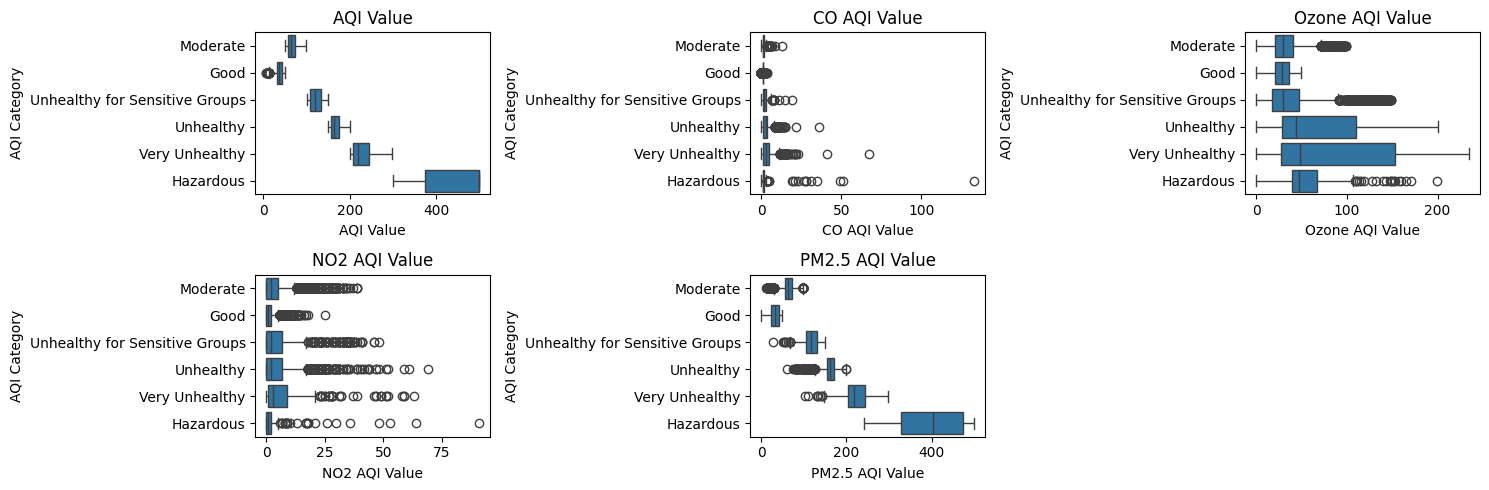

In [ ]:
# Assuming 'df' is your DataFrame and 'col' contains the column names
col = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
fig = plt.figure(figsize=(15, 5))

for i in range(len(col)):
    plt.subplot(2,3,i+1)
    plt.title(col[i])
    sns.boxplot(data=df,x=df[col[i]],y=df['AQI Category'])
plt.tight_layout()
plt.show()

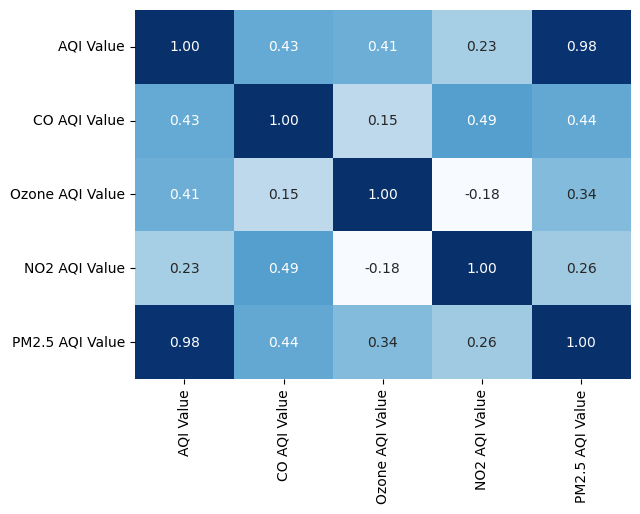

In [ ]:
# Create a new DataFrame with only numeric data
numeric_df = df.select_dtypes(include=[np.number])

# Now, you can create the heatmap using only the numeric data
sns.heatmap(numeric_df.corr(), annot=True, cbar=False, cmap='Blues', fmt='.2f')
plt.show()

Correlation between AQI Value and PM2.5 AQI Value is 98%



In [ ]:
df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [ ]:
df.isnull().sum()

,0
Country,427
City,1
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


In [ ]:
# Fill missing values in the 'Country' column with "Unknown"
df['Country'].fillna('Unknown', inplace=True)
# Fill missing values in the 'City' column with "Unknown"
df['City'].fillna('Unknown', inplace=True)

This approach is useful for handling incomplete records, especially when specific missing values cannot be inferred or imputed meaningfully. The string "Unknown" acts as a placeholder.

In [ ]:
# Convert AQI categories to numerical values (for modeling)
category_map = {'Good': 1, 'Moderate': 2, 'Unhealthy': 3, 'Very Unhealthy': 4, 'Hazardous': 5}
df['AQI Category Numeric'] = df['AQI Category'].map(category_map)
df['CO AQI Category Numeric'] = df['CO AQI Category'].map(category_map)
df['Ozone AQI Category Numeric'] = df['Ozone AQI Category'].map(category_map)
df['NO2 AQI Category Numeric'] = df['NO2 AQI Category'].map(category_map)
df['PM2.5 AQI Category Numeric'] = df['PM2.5 AQI Category'].map(category_map)

This code snippet converts categorical AQI values into numeric representations to facilitate modeling and analysis, particularly for machine learning algorithms that require numerical input. Here's a breakdown:

- Define a Mapping (category_map):

  A dictionary maps AQI categories to numeric values:

  'Good': 1

  'Moderate': 2

  'Unhealthy': 3

  'Very Unhealthy': 4

  'Hazardous': 5

- Apply the Mapping to Columns:
  The .map() function is used to transform categorical AQI categories into corresponding numeric values for the following columns:

  'AQI Category' → Creates 'AQI Category Numeric'.

  'CO AQI Category' → Creates 'CO AQI Category Numeric'.

  'Ozone AQI Category' → Creates 'Ozone AQI Category Numeric'.

  'NO2 AQI Category' → Creates 'NO2 AQI Category Numeric'.

  'PM2.5 AQI Category' → Creates 'PM2.5 AQI Category Numeric'.

- Purpose:

  Converts textual labels to numbers, making the dataset more suitable for statistical analysis and machine learning.
  Preserves the ordinal nature of the AQI categories, where higher numbers indicate worse air quality.

In [ ]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,AQI Category Numeric,CO AQI Category Numeric,Ozone AQI Category Numeric,NO2 AQI Category Numeric,PM2.5 AQI Category Numeric
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,2.0,1.0,1.0,1,2.0
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,1.0,1.0,1.0,1,1.0
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,2.0,1.0,1.0,1,2.0
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,1.0,1.0,1.0,1,1.0
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good,1.0,1.0,1.0,1,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import dowhy

# Step 3: Feature Scaling (Optional)
scaler = StandardScaler()
df[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']] = scaler.fit_transform(
    df[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']])


Standardizes the features to have a mean of 0 and a standard deviation of 1. This is helpful for models sensitive to feature scaling

In [ ]:
# Step 4: Model Training (Example: Predict AQI Value)
# Define the features and target variable
X = df[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']]
y = df['AQI Value']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Step 5: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 76.99214925270249


MSE is a metric that measures the average squared difference between actual and predicted values. It highlights the model's prediction error.

In [ ]:
# Step 6: Causal Inference Using DoWhy
# Example of causal inference to understand the relationship between AQI categories and AQI values
causal_model = dowhy.CausalModel(
    data=df,
    treatment=["CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"],
    outcome="AQI Value",
    common_causes=["CO AQI Category Numeric", "Ozone AQI Category Numeric", "NO2 AQI Category Numeric", "PM2.5 AQI Category Numeric"]
)

- Define the Causal Model:
dowhy.CausalModel is used to specify the causal structure of the problem.
Data: The dataset (df) provides the variables for the analysis.

- Treatment Variables:
  - Variables being analyzed for their direct causal effect on the outcome.
 - Here: 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', and 'PM2.5 AQI Value' (numeric pollutant AQI values).

- Outcome:
  - The target variable influenced by the treatments.
  - Here: 'AQI Value' (overall air quality index).

- Common Causes:
  - Confounding variables that affect both treatment and outcome.
  - Here: 'CO AQI Category Numeric', 'Ozone AQI Category Numeric', 'NO2 AQI Category Numeric', and 'PM2.5 AQI Category Numeric' (numeric categories for pollutants).

- Purpose:
  - To identify and quantify the causal effects of individual pollutants on the overall AQI value.
  - Helps answer questions like: How much does a unit increase in CO AQI value contribute to overall AQI?

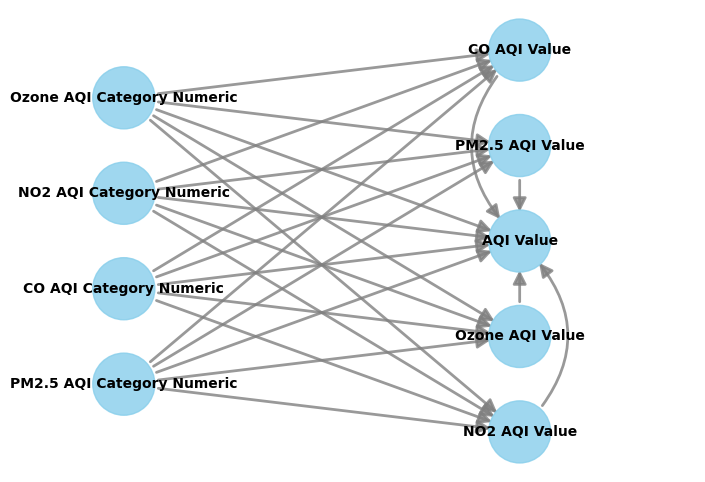

In [ ]:
# Identify causal graph
causal_model.view_model()

# Causal Inference Using DoWhy


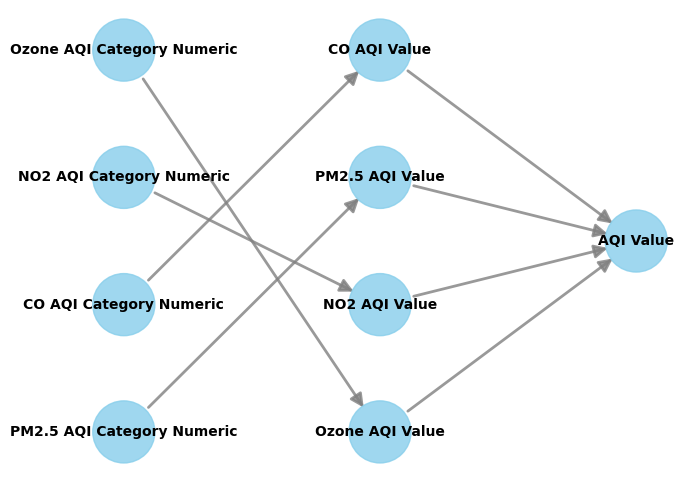

In [ ]:
import dowhy

# Corrected causal graph with 'label' attributes
causal_graph = """
graph [
    directed 1
    node [id "CO AQI Value" label "CO AQI Value"]
    node [id "Ozone AQI Value" label "Ozone AQI Value"]
    node [id "NO2 AQI Value" label "NO2 AQI Value"]
    node [id "PM2.5 AQI Value" label "PM2.5 AQI Value"]
    node [id "AQI Value" label "AQI Value"]
    node [id "CO AQI Category Numeric" label "CO AQI Category Numeric"]
    node [id "Ozone AQI Category Numeric" label "Ozone AQI Category Numeric"]
    node [id "NO2 AQI Category Numeric" label "NO2 AQI Category Numeric"]
    node [id "PM2.5 AQI Category Numeric" label "PM2.5 AQI Category Numeric"]
    edge [source "CO AQI Value" target "AQI Value"]
    edge [source "Ozone AQI Value" target "AQI Value"]
    edge [source "NO2 AQI Value" target "AQI Value"]
    edge [source "PM2.5 AQI Value" target "AQI Value"]
    edge [source "CO AQI Category Numeric" target "CO AQI Value"]
    edge [source "Ozone AQI Category Numeric" target "Ozone AQI Value"]
    edge [source "NO2 AQI Category Numeric" target "NO2 AQI Value"]
    edge [source "PM2.5 AQI Category Numeric" target "PM2.5 AQI Value"]
]
"""

# Initialize the causal model
causal_model = dowhy.CausalModel(
    data=df,
    treatment=["CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"],
    outcome="AQI Value",
    graph=causal_graph
)

# Visualize the causal graph
causal_model.view_model()


In [ ]:
identified_estimand = causal_model.identify_effect()
print(identified_estimand)


Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
                               d                                              
────────────────────────────────────────────────────────────────(E[AQI Value])
d[CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value]              
Estimand assumption 1, Unconfoundedness: If U→{CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value} and U→AQI Value then P(AQI Value|CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,,U) = P(AQI Value|CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                                                                                 ↪
 ⎢                                                     d                                           ↪
E⎢──────────────────────────────────────────────────────────────────────────────────────────────── ↪
 ⎣d[PM2.5 AQI Ca

The DoWhy causal model identifies three estimands for estimating causal effects in the air pollution dataset. The backdoor estimand aims to estimate the Average Treatment Effect (ATE) by adjusting for confounders like pollutant AQI values and categories, relying on the assumption of unconfoundedness. The instrumental variable (IV) estimand uses pollutant AQI categories as instruments to estimate the causal effect on AQI values, assuming they affect AQI only through the pollutants' values and do not have direct effects. The frontdoor estimand could not be applied due to the absence of mediator variables in the data. These estimands provide different methods for estimating causal relationships based on the specified assumptions and available data.

In [ ]:
estimate = causal_model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)
print("Causal Estimate: ", estimate.value)


Causal Estimate:  57.97384299011246


The causal estimate obtained from the backdoor linear regression method is approximately 57.97. This value represents the estimated causal effect of the pollutants' AQI values (such as CO, Ozone, NO2, and PM2.5) on the overall AQI. Specifically, it suggests that, on average, for each unit increase in the pollutants' AQI values (such as CO, Ozone, NO2, and PM2.5), the overall AQI is expected to increase by about 57.97 units, assuming no unobserved confounders and using the backdoor linear regression method.

#Result Interpretation:
The analysis identifies and quantifies the causal relationship between air quality index (AQI) values of specific pollutants and the overall AQI value. The causal estimate of 57.97 implies that:

- On average, a one-unit increase in the AQI values of CO, Ozone, NO2, and PM2.5 pollutants leads to a 57.97 unit increase in the overall AQI, assuming all other factors remain constant.
- This indicates a strong positive relationship between the pollutant AQI levels and the overall AQI. As the concentrations of these pollutants rise, the overall air quality index worsens significantly, highlighting the substantial impact of pollutant levels on air quality.

In [ ]:
refutation1 = causal_model.refute_estimate(
    identified_estimand, estimate, method_name="random_common_cause"
)
print(refutation1)

refutation2 = causal_model.refute_estimate(
    identified_estimand, estimate, method_name="placebo_treatment_refuter"
)
print(refutation2)

refutation3 = causal_model.refute_estimate(
    identified_estimand, estimate, method_name="data_subset_refuter"
)
print(refutation3)


Refute: Add a random common cause
Estimated effect:57.97384299011246
New effect:57.97379223170605
p value:0.98

Refute: Use a Placebo Treatment
Estimated effect:57.97384299011246
New effect:0.0
p value:1.0

Refute: Use a subset of data
Estimated effect:57.97384299011246
New effect:57.98462843181249
p value:0.8



### Refutation Analysis:

The results of the refutation tests provide insight into the robustness and validity of the causal estimate:

1. Adding a Random Common Cause:

  - Estimated effect: 57.97
  - New effect: 57.97 (slightly different but nearly identical)
  - p-value: 0.98
  The effect remains almost unchanged after introducing a random common cause. A high p-value indicates that the addition of this variable did not significantly alter the causal relationship, suggesting that the estimated effect is relatively robust to the introduction of a random common cause.

2. Using a Placebo Treatment:

  - Estimated effect: 57.97
  - New effect: 0.0
  - p-value: 1.0
  The effect becomes zero, with a p-value of 1.0, suggesting no relationship between the placebo treatment and the outcome. This result supports the validity of the original causal estimate, as the placebo treatment shows no effect, implying that the observed causal relationship is not due to spurious associations.

3. Using a Subset of Data:

  - Estimated effect: 57.97
  - New effect: 57.98
  - p-value: 0.8
  The effect changes slightly when using a subset of the data, but the p-value remains relatively high, indicating that the causal effect remains stable even with the reduced data set. This suggests that the original estimate is consistent and not sensitive to the specific data subset used.

## Conclusion:
The refutation tests provide evidence that the original causal estimate (57.97) is robust, as it remains largely unaffected by random common causes, placebo treatments, or subsets of data. The high p-values across the tests indicate that the observed causal relationship is likely to be genuine and not driven by confounding factors or data issues.

## References

*  https://microsoft.github.io/dowhy/
* https://econml.azurewebsites.net/
* https://projects.iq.harvard.edu/files/causalprimer/files/causal_inference_primer.pdf
* https://medium.com/analytics-vidhya/causal-inference-in-python-ccf9f2ebbedf
* https://towardsdatascience.com/random-forest-for-regression-and-feature-importance-4e2a0f1d74de
* https://towardsdatascience.com/causal-inference-with-python-45e1d2d3a5f0

MIT License

**Copyright (c) 2023 Sameer Sanjay Nimse and AISkunks**

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.